<a href="https://colab.research.google.com/github/rsztjnxz/CS634-hw2-2-/blob/main/cs634_hw2(RE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Down load data

In [28]:
!gdown https://drive.google.com/uc?export=download&id=1eIHm56FPV2B0VOW6fgf2tQWEu-tkk36w

Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 2.34MB/s]


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/data_hw2.csv')

df.head()

x = df.BB_COUNT
x = pd.DataFrame(x)
y = x.value_counts


#Creat X and Y variable

In [151]:
Sum_list = list(y)
Total = sum(Sum_list)

res = list()
for i in range(0, len(Sum_list), 1):
  res.append((round(Sum_list[i]/Total,5)))


In [152]:
New_X = x['BB_COUNT']
list_New_X = New_X.tolist()

res_x = list()
for i in list_New_X:
  if i not in res_x:
    res_x.append(i)

df1 = pd.DataFrame({'x':res_x, 
                     'count':Sum_list,
                    'y':res})

In [99]:
dfx = np.array(df1.x)
dfy = np.array(df1.y)

# Make the hist of X variable

Text(0, 0.5, 'counts')

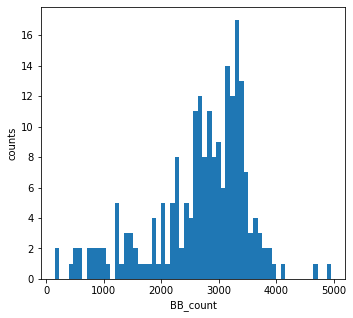

In [159]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(df.BB_COUNT,bins=60)
plt.xlabel('BB_count');plt.ylabel('counts')

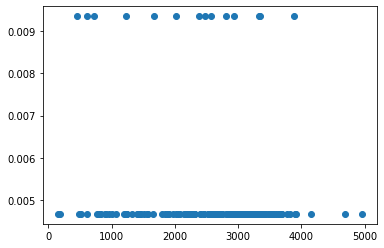

In [154]:
plt.scatter(dfx,dfy)
plt.show()

# Build Gradient Descend Function

In [161]:
def descend(dfx, dfy, lambd, learning_rate,n_iterables):
  m = len(dfx)
  for i in range(n_iterables):
    lambd_grad=0
    for j in range(m):
      lambd_grad += (1/m)* (poisson.pmf(dfx[j],lambd)-dfy[j])

    lambd = lambd - (learning_rate * lambd_grad)
    if i % 5 == 0:
      print(f'No.{i} times iterables')
      print("lambd_grad:",lambd_grad)
      print('lambd:',lambd)
      plt.scatter(dfx,dfy,color="maroon",marker='x')
      plt.plot(dfx, poisson.pmf(dfx,lambd) )
      plt.show()
    return lambd

start iteration
No.0 times iterables
lambd_grad: -0.004997600000000019
lambd: 0.00024988000000000093


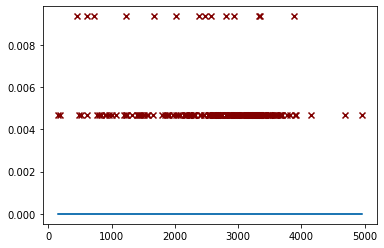

after 500 iteration: lambda = 0.00024988000000000093


In [163]:
n_iterables = 500 # iteration times
learning_rate = 0.05 
lambd = 0
print("start iteration")
lambd = descend(dfx, dfy, lambd, learning_rate,n_iterables)
print(f'after {n_iterables} iteration: lambda = {lambd}')